# Veryfication of the implemented LJ 12-6-4 potential



In [20]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn

In [132]:
def lj126(x: float) -> float:
    eps, sig = 1.0, 1.0
    return 4*eps*(pow(sig/x, 12) - pow(sig/x, 6))

def force_lj126(x: float) -> float:
    eps, sig = 1.0, 1.0
    return 48*eps*pow(sig/x, 13) - 24*eps*pow(sig/x, 7)

def lj1264(x: float) -> float:
    eps, sig, c = 1.0, 1.0, 1.0
    return 4*eps*(pow(sig/x, 12) - pow(sig/x, 6)) - c/pow(x, 4.0)

def force_lj1264(x: float) -> float:
    eps, sig, c = 1.0, 1.0, 1.0
    return 48*eps*pow(sig/x, 13) - 24*eps*pow(sig/x, 7) + 4*c/pow(x, 5.0)

In [112]:
def readdataframe(input_file):
    current_item, value = None, None
    skip_items = ['BOX BOUNDS pp pp pp', 'NUMBER OF ENTRIES']
    data = []
    for line in open(input_file, 'r'):
        if 'ITEM' in line:
            current_item = line.replace('ITEM: ', '').replace('\n', '')
            continue
        if current_item in skip_items:
            continue
        if 'ENTRIES' in current_item:
            ls = line.replace('\n', '').strip().split(' ')[1:]
            data.append(list(map(float, ls)))
    return data

In [113]:
data_lj126 = np.array(readdataframe('data_lj126.dump'))
data_lj1264 = np.array(readdataframe('data_lj1264.dump'))

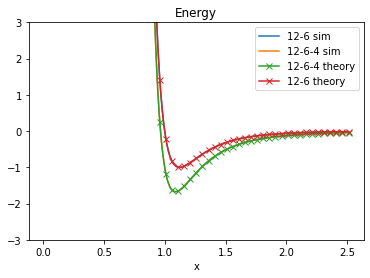

In [136]:
plt.ylim([-3, 3])
plt.plot(data_lj126[:, 0], data_lj126[:, 1], label='12-6 sim')
plt.plot(data_lj1264[:, 0], data_lj1264[:, 1], label='12-6-4 sim')
plt.plot(data_lj1264[:, 0], lj1264(data_lj1264[:, 0]), label='12-6-4 theory', marker='x', markevery=100)
plt.plot(data_lj126[:, 0], lj126(data_lj126[:, 0]), label='12-6 theory', marker='x', markevery=100)
plt.xlabel('x')
plt.title('Energy')
plt.legend(loc=0)